In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

### Load Data Training

In [2]:
filename = "Neural Network/w2v_70/Train_Data.csv"
df = pd.read_csv(filename)
df.head()

,Berita,Label,Category_id,Word2Vec Vector
0,"['ayah', 'pinrang', 'tangkap', 'sandera', 'anc...",keluarga,0,"[0.1796092838048935, 0.4170130491256714, -0.04..."
1,"['duga', 'anak', 'bawa', 'orang', 'kenal', 'at...",orang asing,4,"[0.10238317400217056, 0.2470414936542511, 0.27..."
2,"['dpa', 'laku', 'damping', 'korban', 'laku', '...",teman,3,"[0.35820725560188293, 0.20362965762615204, 0.2..."
3,"['inara', 'rusli', 'bawa', 'kunci', 'bukti', '...",keluarga,0,"[0.16313651204109192, 0.26164698600769043, 0.2..."
4,"['viral', 'video', 'bocah', 'ikat', 'tiang', '...",orang asing,4,"[0.2542842924594879, 0.24875245988368988, 0.26..."


### Processing The Data for Neural Network Input

In [3]:
# Get the locations
X_train = df['Word2Vec Vector']
y_train = df['Category_id']

In [4]:
# Convert string to float
X_train = np.array([list(map(float, row.strip("[]").split(','))) for row in X_train])
X_train = X_train.T

In [5]:
X_train

array([[ 0.17960928,  0.10238317,  0.35820726, ...,  0.27806711,
         0.42479664,  0.35719058],
       [ 0.41701305,  0.24704149,  0.20362966, ...,  0.24155277,
         0.10447986,  0.26109946],
       [-0.04744937,  0.27464882,  0.2630544 , ...,  0.24423018,
        -0.03571824,  0.15572512],
       ...,
       [ 0.40574414,  0.08813259,  0.2579141 , ...,  0.28065443,
         0.26021251,  0.1309738 ],
       [ 0.245582  ,  0.30407691,  0.35038081, ...,  0.53148139,
         0.16793445,  0.32690907],
       [ 0.08898055,  0.43934801,  0.36289123, ...,  0.43777528,
         0.25592601,  0.12616619]])

In [6]:
y_train = np.array(y_train)

In [7]:
# Make it suitable for my Neural Network input
print("Shape X_Train: ", X_train.shape)
print("Shape y_Train: ", y_train.shape)

Shape X_Train:  (100, 780)
Shape y_Train:  (780,)


In [8]:
print("X_train Type:", type(X_train))
print("y_train Type:", type(y_train))

X_train Type: <class 'numpy.ndarray'>
y_train Type: <class 'numpy.ndarray'>


### Model Y3 (Node Hidden Layer 1 = 30, Learning Rate = 0.01)

In [9]:
from Neural_Network import NeuralNetwork

In [10]:
model_name = "Y3"

In [11]:
model = NeuralNetwork(X_train.shape[0], 30, 5)

# init time for training
import time
start_time = time.time()
history_cost, history_acc = model.train_until_cost_doesnt_change(X_train, y_train, 0.01)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1 - train cost: 0.294629, train acc: 0.503846
Epoch 2 - train cost: 0.293467, train acc: 0.503846
Epoch 3 - train cost: 0.292378, train acc: 0.503846
Epoch 4 - train cost: 0.291357, train acc: 0.503846
Epoch 5 - train cost: 0.290397, train acc: 0.503846
Epoch 6 - train cost: 0.289494, train acc: 0.503846
Epoch 7 - train cost: 0.288645, train acc: 0.503846
Epoch 8 - train cost: 0.287845, train acc: 0.503846
Epoch 9 - train cost: 0.287090, train acc: 0.503846
Epoch 10 - train cost: 0.286376, train acc: 0.503846
Epoch 11 - train cost: 0.285703, train acc: 0.503846
Epoch 12 - train cost: 0.285065, train acc: 0.503846
Epoch 13 - train cost: 0.284460, train acc: 0.503846
Epoch 14 - train cost: 0.283886, train acc: 0.503846
Epoch 15 - train cost: 0.283339, train acc: 0.503846
Epoch 16 - train cost: 0.282814, train acc: 0.503846
Epoch 17 - train cost: 0.282311, train acc: 0.503846
Epoch 18 - train cost: 0.281830, train acc: 0.503846
Epoch 19 - train cost: 0.281371, train acc: 0.503846
Ep

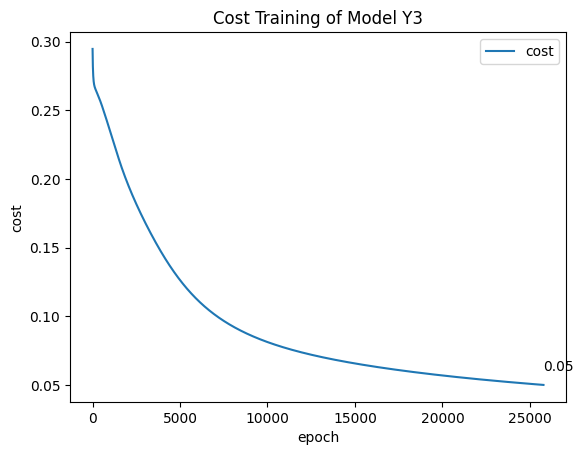

In [12]:
# plot the cost and accuracy in one graph
plt.plot(history_cost, label='cost')
# plt.plot(history_acc, label='accuracy')
plt.text(len(history_cost) - 50, history_cost[-1] + 0.01, str(round(history_cost[-1], 3)))
# plt.text(len(history_acc) - 50, history_acc[-1] - 0.03, str(round(history_acc[-1], 3)))
plt.xlabel('epoch')
plt.ylabel('cost')
plt.title('Cost Training of Model ' + model_name)
plt.legend()

In [13]:
# save the model and the cost and accuracy
file_name = 'NeuralNetwork_Model_' + model_name + '.pkl'
file_name_cost_acc = 'Cost_Accuracy_Model_' + model_name + '.csv'
with open(file_name, 'wb') as f:
    pickle.dump(model, f)

# make cost and accuracy as dataframe
cost_acc = pd.DataFrame({'cost': history_cost, 'accuracy': history_acc})
cost_acc.to_csv(file_name_cost_acc, index=False)

In [14]:
prediction = model.predict(X_train, y_train)
print(prediction)

(array([0, 4, 3, 0, 4, 2, 0, 0, 3, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3,
       3, 4, 0, 2, 4, 0, 0, 3, 1, 4, 0, 0, 3, 2, 3, 1, 1, 0, 1, 4, 0, 4,
       2, 0, 3, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 4,
       1, 3, 3, 0, 0, 3, 0, 0, 3, 0, 4, 1, 0, 3, 4, 0, 0, 1, 0, 0, 4, 0,
       4, 1, 3, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 2, 0, 3,
       2, 0, 0, 0, 3, 0, 0, 0, 0, 3, 4, 0, 4, 0, 0, 3, 0, 1, 0, 0, 3, 4,
       4, 2, 0, 3, 3, 3, 0, 0, 4, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 4, 0,
       0, 4, 2, 0, 4, 3, 4, 3, 0, 0, 0, 3, 2, 0, 4, 0, 0, 0, 0, 1, 4, 4,
       0, 3, 0, 4, 1, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 4, 4, 1,
       4, 1, 0, 4, 3, 0, 2, 3, 3, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0,
       4, 0, 0, 0, 0, 0, 4, 3, 1, 1, 0, 0, 4, 2, 0, 4, 0, 4, 0, 4, 2, 0,
       3, 4, 1, 0, 3, 0, 0, 4, 4, 0, 4, 0, 2, 3, 0, 0, 4, 3, 4, 0, 0, 3,
       0, 4, 0, 0, 0, 4, 4, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 3, 0, 0, 0, 3,
       3, 0, 0, 0, 0, 4, 0, 3, 3, 3, 3, 2, 0, 4, 0